### An example showing the plot_ks_statistic method used by a scikit-learn classifier

In this example, we'll be plotting a `report` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.deciles.report` method.

In [1]:
from sklearn.datasets import load_breast_cancer as data_2_classes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import numpy as np
np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)

# Import scikit-plot
import scikitplot as sp

sp.__version__

'0.5.0.dev0+git.20250430.079ba10'

In [2]:
sp.kds.report?

Signature:
sp.kds.report(
    y_true,
    y_probas,
    *,
    pos_label=None,
    class_index=1,
    display_term_tables=True,
    digits=3,
    title_fontsize='large',
    text_fontsize='medium',
    plot_style=None,
    figsize=(10, 5),
    nrows=2,
    ncols=2,
    data=None,
    **kwargs,
)
Docstring:
Generates a decile table and four plots:

- ``Lift`` -> :func:`~scikitplot.kds.plot_lift`
- ``Lift@Decile`` -> :func:`~scikitplot.kds.plot_lift_decile_wise`
- ``Gain`` -> :func:`~scikitplot.kds.plot_cumulative_gain`
- ``KS`` -> :func:`~scikitplot.kds.plot_ks_statistic`

from labels and probabilities.

Parameters
----------
y_true : array-like, shape (n_samples,)
    Ground truth (correct) target values.

y_probas : array-like, shape (n_samples, n_classes)
    Prediction probabilities for each class returned by a classifier.

class_index : int, optional, default=1
    Index of the class of interest for multi-class classification. Ignored for
    binary classification.

labels : bool, 

In [3]:
# Load the data
X, y = data_2_classes(return_X_y=True, as_frame=False)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.5, random_state=0
)

In [4]:
# Create an instance of the LogisticRegression
# model = LogisticRegression(max_iter=int(1e5), random_state=0).fit(X_train, y_train)
model = (
    DecisionTreeClassifier(max_depth=1, random_state=0)
    .fit(X_train, y_train)
)

# Perform predictions
y_val_prob = model.predict_proba(X_val)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

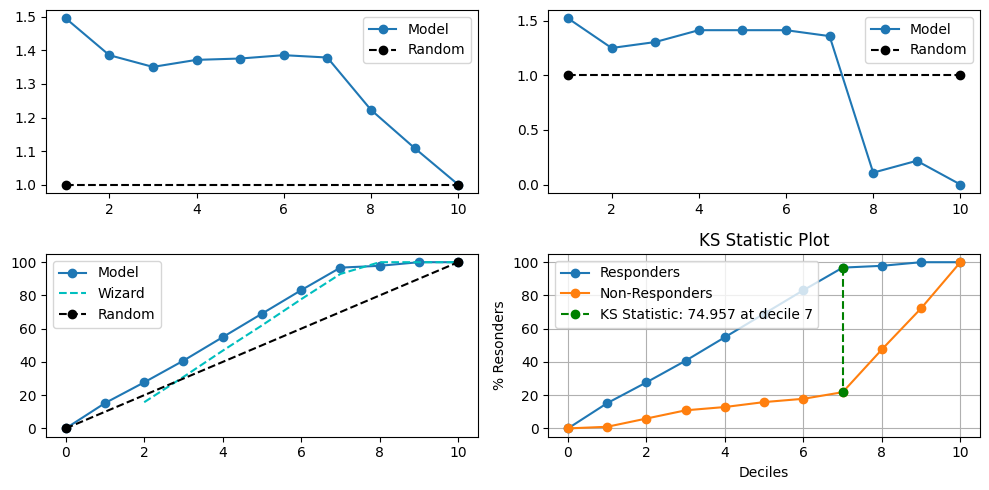

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.923,0.923,0.923,29.0,28.0,1.0,18.4,NaN,96.552,29.0,28.0,NaN,1.0,10.175,15.217,NaN,0.990,14.227,1.496
1,2,0.923,0.923,0.923,28.0,23.0,5.0,18.4,29.0,82.143,57.0,51.0,29.0,6.0,20.000,27.717,15.761,5.941,21.776,1.386
2,3,0.923,0.923,0.923,29.0,24.0,5.0,18.4,28.0,82.759,86.0,75.0,57.0,11.0,30.175,40.761,30.978,10.891,29.870,1.351
3,4,0.923,0.923,0.923,28.0,26.0,2.0,18.4,29.0,92.857,114.0,101.0,86.0,13.0,40.000,54.891,46.739,12.871,42.020,1.372
4,5,0.923,0.923,0.923,29.0,26.0,3.0,18.4,28.0,89.655,143.0,127.0,114.0,16.0,50.175,69.022,61.957,15.842,53.180,1.376
5,6,0.923,0.923,0.923,28.0,26.0,2.0,18.4,29.0,92.857,171.0,153.0,143.0,18.0,60.000,83.152,77.717,17.822,65.330,1.386
6,7,0.049,0.923,0.833,29.0,25.0,4.0,18.4,28.0,86.207,200.0,178.0,171.0,22.0,70.175,96.739,92.935,21.782,74.957,1.379
7,8,0.049,0.049,0.049,28.0,2.0,26.0,18.4,13.0,7.143,228.0,180.0,184.0,48.0,80.000,97.826,100.000,47.525,50.301,1.223
8,9,0.049,0.049,0.049,29.0,4.0,25.0,18.4,0.0,13.793,257.0,184.0,184.0,73.0,90.175,100.000,100.000,72.277,27.723,1.109
9,10,0.049,0.049,0.049,28.0,0.0,28.0,18.4,0.0,0.000,285.0,184.0,184.0,101.0,100.000,100.000,100.000,100.000,0.000,1.000


In [5]:
# Plot!
dt = sp.kds.report(
	y_val,
	y_val_prob[:, 1].ravel(),
)
dt

In [6]:
# !pip install kds

In [7]:
# The magic happens here
# import kds
# kds.metrics.report(
#     y_val, y_val_prob[:, 1].ravel()
# )

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

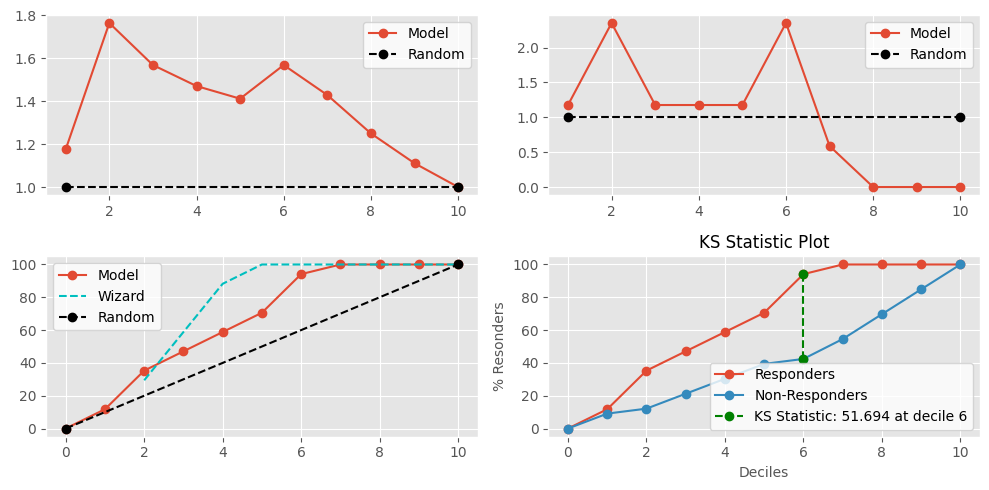

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.485,0.485,0.485,5.0,2.0,3.0,1.7,NaN,40.0,5.0,2.0,NaN,3.0,10.0,11.765,NaN,9.091,2.674,1.176
1,2,0.485,0.485,0.485,5.0,4.0,1.0,1.7,5.0,80.0,10.0,6.0,5.0,4.0,20.0,35.294,29.412,12.121,23.173,1.765
2,3,0.485,0.485,0.485,5.0,2.0,3.0,1.7,5.0,40.0,15.0,8.0,10.0,7.0,30.0,47.059,58.824,21.212,25.847,1.569
3,4,0.485,0.485,0.485,5.0,2.0,3.0,1.7,5.0,40.0,20.0,10.0,15.0,10.0,40.0,58.824,88.235,30.303,28.521,1.471
4,5,0.485,0.485,0.485,5.0,2.0,3.0,1.7,2.0,40.0,25.0,12.0,17.0,13.0,50.0,70.588,100.000,39.394,31.194,1.412
5,6,0.485,0.485,0.485,5.0,4.0,1.0,1.7,0.0,80.0,30.0,16.0,17.0,14.0,60.0,94.118,100.000,42.424,51.694,1.569
6,7,0.000,0.485,0.194,5.0,1.0,4.0,1.7,0.0,20.0,35.0,17.0,17.0,18.0,70.0,100.000,100.000,54.545,45.455,1.429
7,8,0.000,0.000,0.000,5.0,0.0,5.0,1.7,0.0,0.0,40.0,17.0,17.0,23.0,80.0,100.000,100.000,69.697,30.303,1.250
8,9,0.000,0.000,0.000,5.0,0.0,5.0,1.7,0.0,0.0,45.0,17.0,17.0,28.0,90.0,100.000,100.000,84.848,15.152,1.111
9,10,0.000,0.000,0.000,5.0,0.0,5.0,1.7,0.0,0.0,50.0,17.0,17.0,33.0,100.0,100.000,100.000,100.000,0.000,1.000


In [ ]:
# REPRODUCIBLE EXAMPLE
# Load Dataset and train-test split
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.33, random_state=3
)
clf = tree.DecisionTreeClassifier(max_depth=1, random_state=3)
clf = clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)

# The magic happens here
# import kds
# kds.metrics.report(y_test, y_prob[:,1],plot_style='ggplot')
sp.kds.report(
	y_test,
	y_prob[:, 1].ravel(),
	plot_style='ggplot',
)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

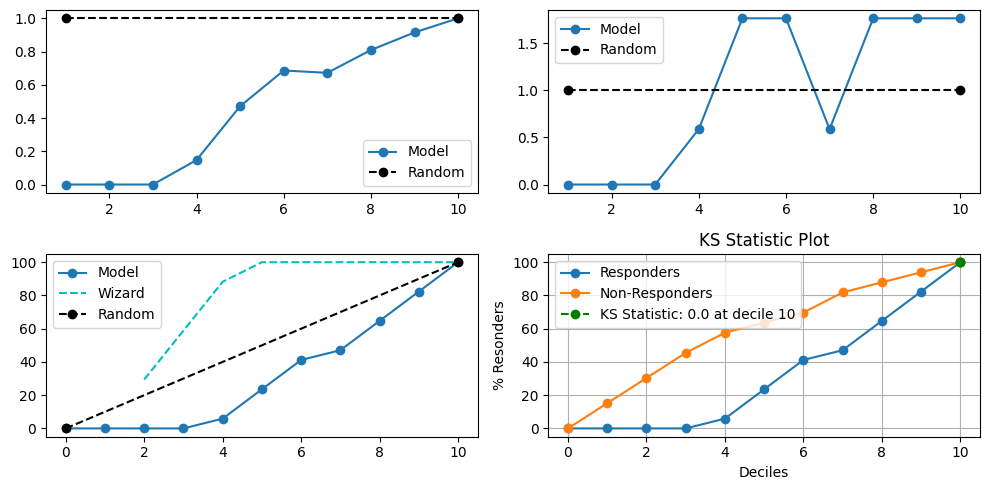

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.5,0.5,0.5,5.0,0.0,5.0,1.7,NaN,0.0,5.0,0.0,NaN,5.0,10.0,0.000,NaN,15.152,-15.152,0.000
1,2,0.5,0.5,0.5,5.0,0.0,5.0,1.7,5.0,0.0,10.0,0.0,5.0,10.0,20.0,0.000,29.412,30.303,-30.303,0.000
2,3,0.5,0.5,0.5,5.0,0.0,5.0,1.7,5.0,0.0,15.0,0.0,10.0,15.0,30.0,0.000,58.824,45.455,-45.455,0.000
3,4,0.0,0.5,0.3,5.0,1.0,4.0,1.7,5.0,20.0,20.0,1.0,15.0,19.0,40.0,5.882,88.235,57.576,-51.694,0.147
4,5,0.0,0.0,0.0,5.0,3.0,2.0,1.7,2.0,60.0,25.0,4.0,17.0,21.0,50.0,23.529,100.000,63.636,-40.107,0.471
5,6,0.0,0.0,0.0,5.0,3.0,2.0,1.7,0.0,60.0,30.0,7.0,17.0,23.0,60.0,41.176,100.000,69.697,-28.521,0.686
6,7,0.0,0.0,0.0,5.0,1.0,4.0,1.7,0.0,20.0,35.0,8.0,17.0,27.0,70.0,47.059,100.000,81.818,-34.759,0.672
7,8,0.0,0.0,0.0,5.0,3.0,2.0,1.7,0.0,60.0,40.0,11.0,17.0,29.0,80.0,64.706,100.000,87.879,-23.173,0.809
8,9,0.0,0.0,0.0,5.0,3.0,2.0,1.7,0.0,60.0,45.0,14.0,17.0,31.0,90.0,82.353,100.000,93.939,-11.586,0.915
9,10,0.0,0.0,0.0,5.0,3.0,2.0,1.7,0.0,60.0,50.0,17.0,17.0,33.0,100.0,100.000,100.000,100.000,0.000,1.000


In [9]:
# Plot!
dt = sp.kds.report(
	y_test,
	y_prob[:, 0] / 2,
	# figsize=(11, 7)
)
dt